# *Pipelines* para datos numéricos

Se va a emplear estadísticas para preprocesamiento de datos. Este preprocesamiento es importante por los siguientes motivos.

- **Escalamiento lineal o normalización**. Los algoritmos de aprendizaje automático son óptimos en la medida en que las variables que son ingestadas por el algoritmo se encuentran en escalas semejantes. Por ello, para facilitar la convergencia de estos modelos, es recomendable tener las variables numéricas en el rango $[0, \ 1]$. En este sentido, si las variables no están en este rango, deben ser **escaladas** para llevarlas a este intervalo. Vale la pena destacar que los **escaladores lineales** se emplean cuando los datos poseen distribuciones simétricas. Hay diferentes tipos de escalamiento.
    - Máximo y mínimo.
    - *Clipping*.
    - $Z$-*score*.
    - *Winsorizing*.

Supongamos que tenemos unos datos $X_1, \ X_2, \ \dots, \ X_n$, y que $X_{(1)}$ es el valor mínimo y $X_{(n)}$ es el valor máximo de nuestra distribución. Así, cada uno de los escaladores lineales anteriores se definen como siguen:

## Transformaciones lineales

### Escalador *min-max*

Sea $x_s$ el valor escalado de una observación $x \in \{X_1, \ X_2, \ \dots, \ X_n \}$. Entonces:

$$x_s = \frac{2x - X_{(1)} - X_{(n)}}{X_{(n)} - X_{(1)}}$$

### Escalador **clipping**

En este caso se cambia el máximo y el mínimo por unos valores $X_{(i)}$ y $X_{(j)}$ arbitrarios (aunque habitualmente se escogen los percentiles), con $i < j$, donde todos los valores, donde los valores que se encuentren por debajo de $X_{(i)}$ son igualados a este, y se hace algo análogo con los valores mayores a $X_{(j)}$, mientras que los valores intermedios son dejados iguales.

### Escalador $Z$-*score*

Este se conoce también como **normalización**. Sea $z$ el valor normalizado de un $x \in \{X_1, \ X_2, \ \dots, \ X_n \}$, entonces:

$$z = \frac{x - \mu_X}{\sigma_X}$$

donde $\mu_X$ y $\sigma_X$ son la media y la desviación estándar de la distribución.

## Transformaciones lineales

También es posible trabajar con variables cuya distribución no sea simétrica. Para ello se realiza una transformación previa que permita generar una distribución simétrica que faciliten el uso de las metodologías anteriormente descritas.

### Tangente hiperbólica

Sea $f(x) = \text{tanh} (x)$. Se sabe que $R_f = [0, \ 1]$.
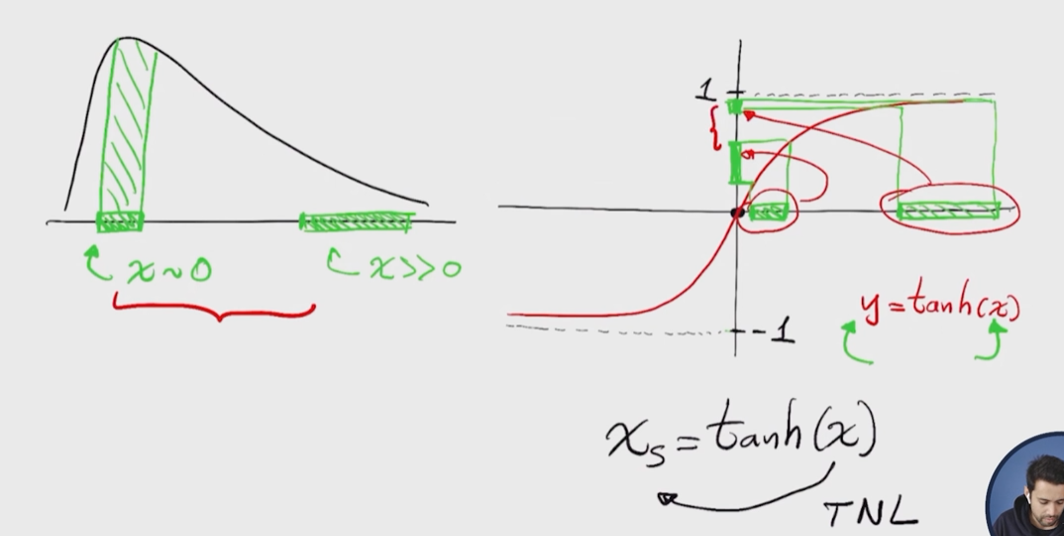

Como se ve los, diferentes valores de la distribución son mapeados a valores que se encuentran entre cero y uno gracias al rango de la función tangente hiperbólica.

# Procesamiento de datos numéricos en `Python`

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import timeit
from sklearn import datasets, linear_model

In [3]:
X, y = datasets.load_diabetes(return_X_y = True)
raw = X[:, None, 2]

### Regla del máximo-mínimo

In [4]:
max_raw = max(raw)
min_raw = min(raw)
scaled = (2 * raw - max_raw - min_raw) / (max_raw - min_raw)

Veamos una gráfica de los datos originales y de los datos escalados:

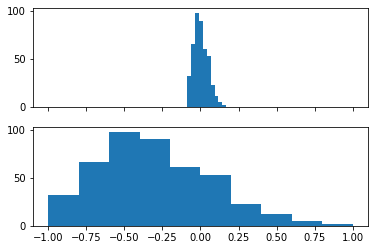

In [5]:
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].hist(raw)
ax[1].hist(scaled)
plt.show()

Consideremos un par de funciones para entrenar el modelo:

In [6]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [7]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)

In [8]:
print('train_raw: {}'.format(raw_time), '\ntrain_scaled: {}'.format(scaled_time))

train_raw: 0.04509419994428754 
train_scaled: 0.030135600012727082


# Transformaciopnes no lineales

In [9]:
df = pd.read_csv('../Datos/cars.csv')

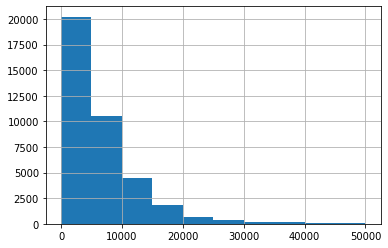

In [10]:
df.price_usd.hist()
plt.show()

Realicemos una transformación hiperbólica al precio en dólares de los carros, lo cual tiene sentido teniendo en cuenta que es una distribución fuertemente sesgada.

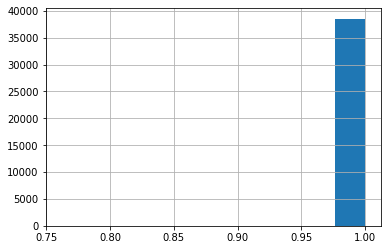

In [11]:
df.price_usd.apply(lambda x: np.tanh(x)).hist()
plt.show()

Como se puede observar todos los datos han sido llevados a valores entre 0 y 1. Si embargo, se puede notar que están muy sesgados hacia el número uno. Para mejorar eso, podemos dividir al argumento $x$ de la tangente hiperbólica por cualquier constante positiva. Intentemos con 1,000:

<AxesSubplot:>

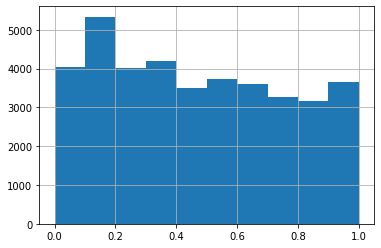

In [14]:
df.price_usd.apply(lambda x: np.tanh(x/10000)).hist()